# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ciudad lazaro cardenas
Processing Record 2 of Set 1 | mount isa
Processing Record 3 of Set 1 | moyynkum
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | hawaiian paradise park
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | bilibino
Processing Record 8 of Set 1 | loukhi
Processing Record 9 of Set 1 | bojnurd
Processing Record 10 of Set 1 | vitebsk
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | opuwo
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | devinuwara
City not found. Skipping...
Processing Record 15 of Set 1 | pimentel
Processing Record 16 of Set 1 | barguzin
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | papatowai
Processing Record 21 of Set 1 | taiohae
City not found. Skipp

Processing Record 40 of Set 4 | puerto armuelles
Processing Record 41 of Set 4 | lompoc
Processing Record 42 of Set 4 | pionerskiy
Processing Record 43 of Set 4 | mlowo
Processing Record 44 of Set 4 | jaffa
Processing Record 45 of Set 4 | gadzhiyevo
Processing Record 46 of Set 4 | barah
Processing Record 47 of Set 4 | saint-philippe
Processing Record 48 of Set 4 | utrik
Processing Record 49 of Set 4 | crane
Processing Record 0 of Set 5 | wanning
Processing Record 1 of Set 5 | nemuro
Processing Record 2 of Set 5 | ridder
Processing Record 3 of Set 5 | al jawf
Processing Record 4 of Set 5 | sitka
Processing Record 5 of Set 5 | guerrero negro
Processing Record 6 of Set 5 | whakatane
Processing Record 7 of Set 5 | dazhong
Processing Record 8 of Set 5 | aasiaat
Processing Record 9 of Set 5 | stirling
Processing Record 10 of Set 5 | cabo san lucas
Processing Record 11 of Set 5 | margaret river
Processing Record 12 of Set 5 | horta
Processing Record 13 of Set 5 | georgetown
Processing Record 

Processing Record 35 of Set 8 | fairbanks
Processing Record 36 of Set 8 | dhidhdhoo
Processing Record 37 of Set 8 | adh dhibiyah
City not found. Skipping...
Processing Record 38 of Set 8 | iringa
Processing Record 39 of Set 8 | cable beach
City not found. Skipping...
Processing Record 40 of Set 8 | wainwright
Processing Record 41 of Set 8 | sultanah
Processing Record 42 of Set 8 | mananjary
Processing Record 43 of Set 8 | port augusta
Processing Record 44 of Set 8 | dem'yanovo
Processing Record 45 of Set 8 | karamay
City not found. Skipping...
Processing Record 46 of Set 8 | ponta delgada
Processing Record 47 of Set 8 | saint-pierre
Processing Record 48 of Set 8 | sabang
Processing Record 49 of Set 8 | chos malal
Processing Record 0 of Set 9 | nolinsk
Processing Record 1 of Set 9 | prachuap khiri khan
Processing Record 2 of Set 9 | gordonvale
Processing Record 3 of Set 9 | vadso
Processing Record 4 of Set 9 | codrington
Processing Record 5 of Set 9 | bamendjou
Processing Record 6 of Se

Processing Record 23 of Set 12 | miranda
Processing Record 24 of Set 12 | yeraliyev
Processing Record 25 of Set 12 | samalkha
Processing Record 26 of Set 12 | notodden
Processing Record 27 of Set 12 | mo i rana
Processing Record 28 of Set 12 | viljoenskroon
Processing Record 29 of Set 12 | porvoo
Processing Record 30 of Set 12 | navapolatsk
Processing Record 31 of Set 12 | iztapalapa
Processing Record 32 of Set 12 | bjuv
Processing Record 33 of Set 12 | richfield
Processing Record 34 of Set 12 | cairns city
City not found. Skipping...
Processing Record 35 of Set 12 | dzhetygara
Processing Record 36 of Set 12 | winnemucca
Processing Record 37 of Set 12 | severnoye
Processing Record 38 of Set 12 | houghton
Processing Record 39 of Set 12 | sumenep
Processing Record 40 of Set 12 | ulladulla
Processing Record 41 of Set 12 | luquillo
Processing Record 42 of Set 12 | veraval
Processing Record 43 of Set 12 | maslyanino
Processing Record 44 of Set 12 | inarajan village
Processing Record 45 of S

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ciudad lazaro cardenas,17.9583,-102.2000,27.13,60,0,4.20,MX,1706985983
1,mount isa,-20.7333,139.5000,23.87,94,100,6.17,AU,1706985796
2,moyynkum,44.2914,72.9469,-6.91,90,100,2.21,KZ,1706985984
3,port-aux-francais,-49.3500,70.2167,7.96,74,96,4.48,TF,1706985984
4,hawaiian paradise park,19.5933,-154.9731,19.73,87,100,6.69,US,1706985758


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

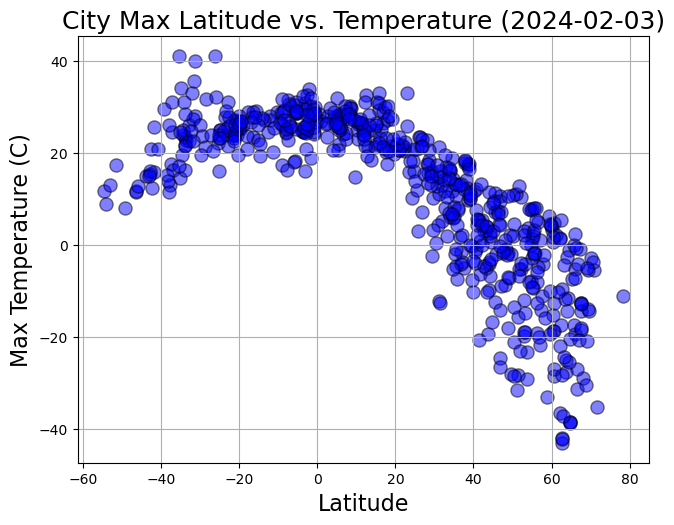

In [55]:
# Build scatter plot for latitude vs. temperature
# Plot main data
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Max Temp"]
plt.scatter(xPlot, yPlot, 90, marker="o", facecolors="blue", edgecolors='black', alpha=0.5)
plt.tight_layout()
plt.grid(True)

# Plot output and styling
# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Max Temperature (C)", fontsize=16)
plt.title("City Max Latitude vs. Temperature (2024-02-03)", fontsize=18)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

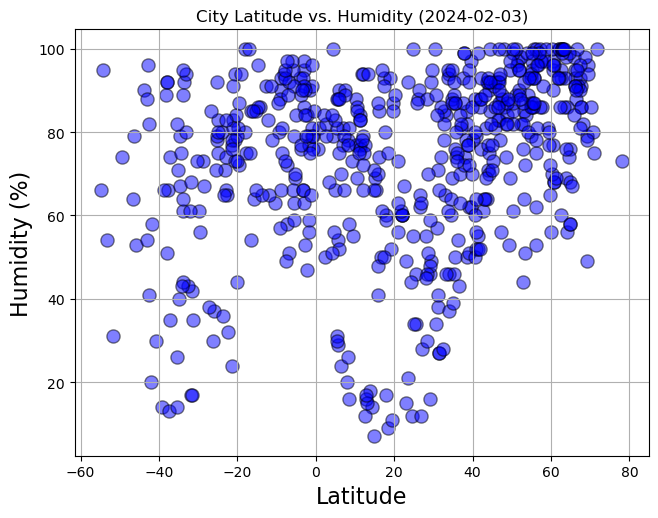

In [28]:
# Build the scatter plots for latitude vs. humidity
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Humidity"]
plt.scatter(xPlot, yPlot, 90, marker="o", facecolors="blue", edgecolors='black', alpha=0.5)
plt.tight_layout()
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Humidity (%)", fontsize=16)
plt.title("City Latitude vs. Humidity (2024-02-03)")

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

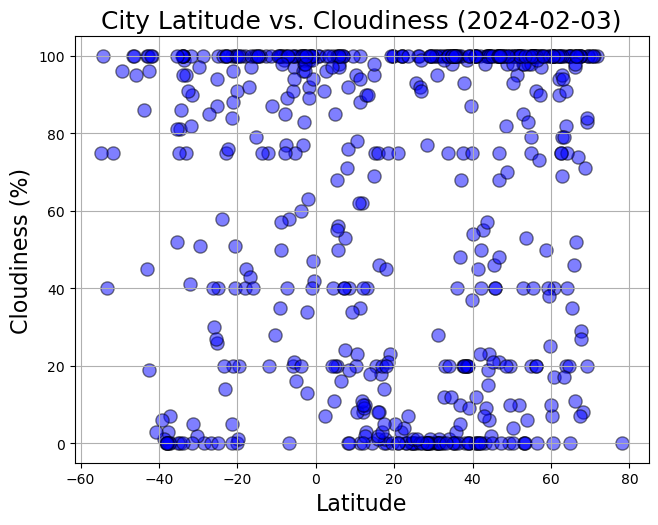

In [29]:
# Build the scatter plots for latitude vs. cloudiness
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Cloudiness"]
plt.scatter(xPlot, yPlot, 90, marker="o", facecolors="blue", edgecolors='black', alpha=0.5)
plt.tight_layout()
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Cloudiness (%)", fontsize=16)
plt.title("City Latitude vs. Cloudiness (2024-02-03)", fontsize=18)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

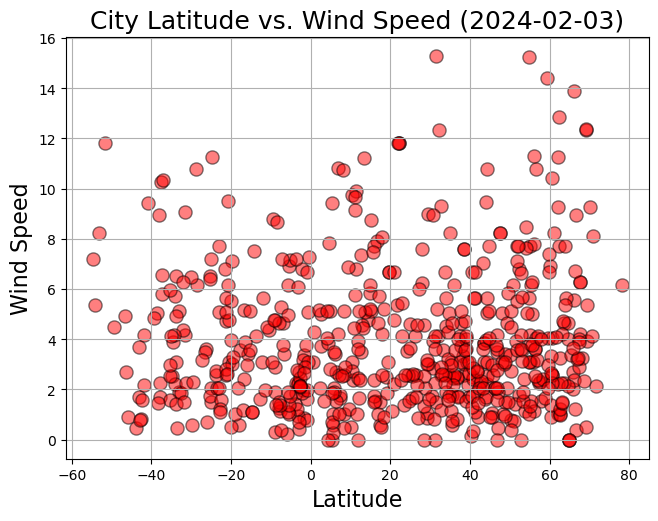

In [30]:
# Build the scatter plots for latitude vs. wind speed
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Wind Speed"]
plt.scatter(xPlot, yPlot, 90, marker="o", facecolors="red", edgecolors='black', alpha=0.5)
plt.tight_layout()
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Wind Speed", fontsize=16)
plt.title("City Latitude vs. Wind Speed (2024-02-03)", fontsize=18)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
# Define a function to create Linear Regression plots
def linearRegression(x_values,y_values, regEQplotX, regEQplotY, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, 90, marker="o", facecolors="blue", alpha=0.5)
    plt.plot(x_values,regress_values,"r-", linewidth=3)
    plt.grid(True)
    print(f'The r-value is {rvalue}')
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=18,color="red")
    plt.xlabel('Latitude', fontsize=16)
    plt.ylabel(f'{ylabel}', fontsize=16)
    plt.grid() 

In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hem_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float)>= 0, :]

# Display sample data
northern_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ciudad lazaro cardenas,17.9583,-102.2000,27.13,60,0,4.20,MX,1706985983
2,moyynkum,44.2914,72.9469,-6.91,90,100,2.21,KZ,1706985984
4,hawaiian paradise park,19.5933,-154.9731,19.73,87,100,6.69,US,1706985758
6,bilibino,68.0546,166.4372,-28.95,82,8,3.25,RU,1706985985
7,loukhi,66.0764,33.0381,-5.21,95,100,5.57,RU,1706985985


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hem_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float)< 0, :]

# Display sample data
southern_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mount isa,-20.7333,139.5000,23.87,94,100,6.17,AU,1706985796
3,port-aux-francais,-49.3500,70.2167,7.96,74,96,4.48,TF,1706985984
5,puerto natales,-51.7236,-72.4875,17.25,31,75,11.83,CL,1706985985
11,opuwo,-18.0607,13.8400,20.82,80,100,0.58,NaN,1706985985
13,pimentel,-6.8367,-79.9342,30.16,51,0,4.63,PE,1706985986


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8361177973479218


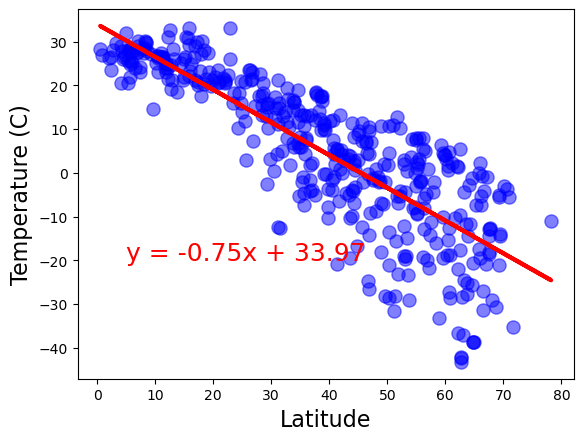

In [37]:
# Linear regression on Northern Hemisphere
x_plot = northern_hem_df["Lat"]
y_plot = northern_hem_df["Max Temp"]
linearRegression(x_plot, y_plot, 5, -20, "Temperature (C)")
plt.savefig("Fig5.png")

The r-value is 0.48199997458576394


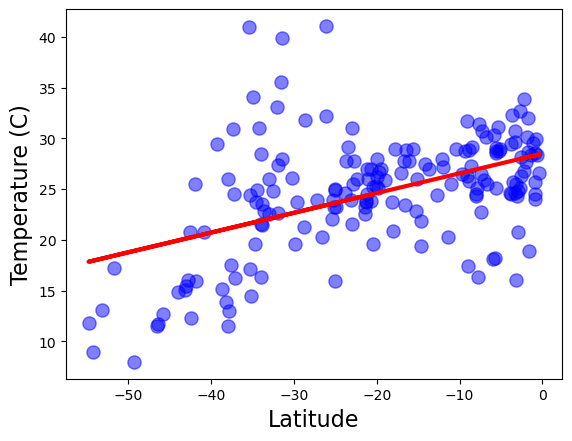

In [40]:
# Linear regression on Southern Hemisphere
x_plot = southern_hem_df["Lat"]
y_plot = southern_hem_df["Max Temp"]
linearRegression(x_plot, y_plot, -60, 32, "Temperature (C)")
plt.savefig("Fig6.png")

**Discussion about the linear relationship:** There's a stronger relationship in the north than in the south, perhaps because there are more cities far north than far south to measure by.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.4104613813444863


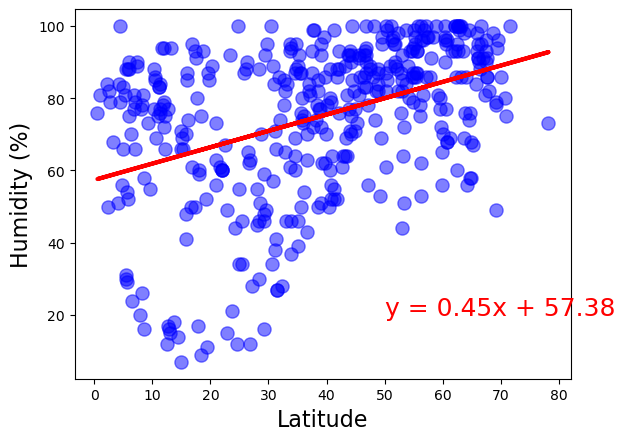

In [43]:
# Northern Hemisphere
x_plot = northern_hem_df["Lat"]
y_plot = northern_hem_df["Humidity"]
linearRegression(x_plot, y_plot, 50, 20, "Humidity (%)")
plt.savefig("Fig7.png")

The r-value is 0.35447594101696983


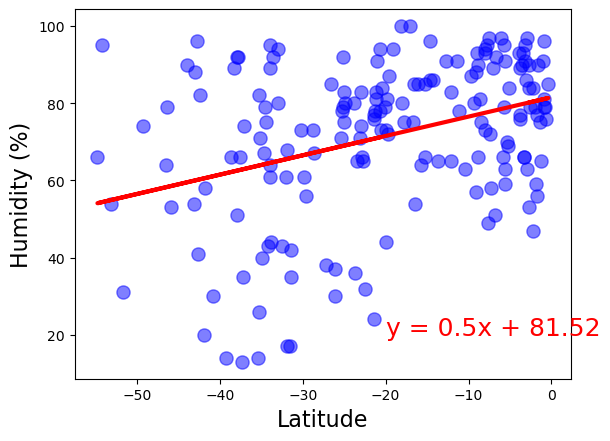

In [44]:
# Southern Hemisphere
x_plot = southern_hem_df["Lat"]
y_plot = southern_hem_df["Humidity"]
linearRegression(x_plot, y_plot, -20, 20, "Humidity (%)")
plt.savefig("Fig8.png")

**Discussion about the linear relationship:** Positive relationship across both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.23394186521592267


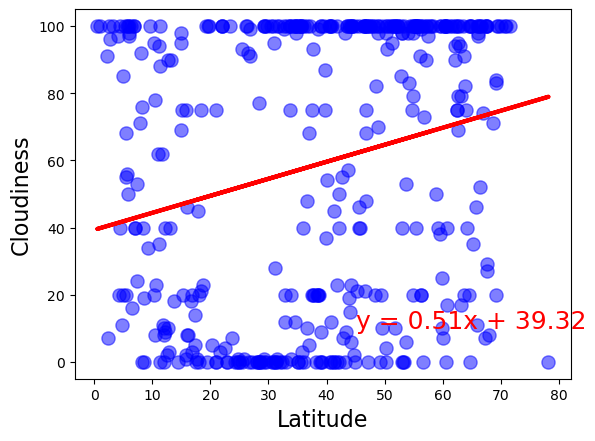

In [45]:
# Northern Hemisphere
x_plot = northern_hem_df["Lat"]
y_plot = northern_hem_df["Cloudiness"]
linearRegression(x_plot, y_plot, 45, 10, "Cloudiness")
plt.savefig("Fig9.png")

The r-value is 0.2252279104511958


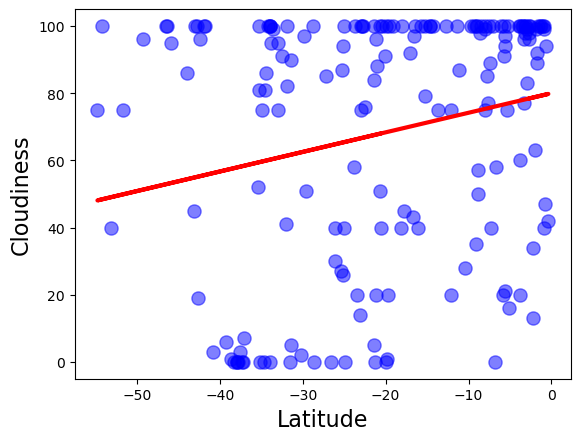

In [47]:
# Southern Hemisphere
x_plot = southern_hem_df["Lat"]
y_plot = southern_hem_df["Cloudiness"]
linearRegression(x_plot, y_plot, -60, 60, "Cloudiness")
plt.savefig("Fig10.png")

**Discussion about the linear relationship:** Positive relationship. More clouds up north it would appear.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.05638811643093596


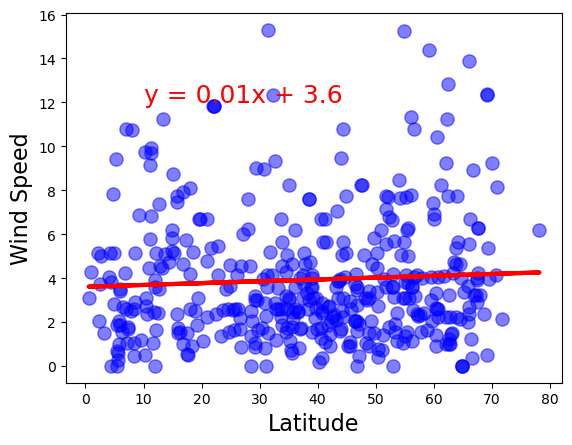

In [49]:
# Northern Hemisphere
x_plot = northern_hem_df["Lat"]
y_plot = northern_hem_df["Wind Speed"]
linearRegression(x_plot, y_plot, 10, 12, "Wind Speed")
plt.savefig("Fig11.png")

The r-value is -0.20943454251841484


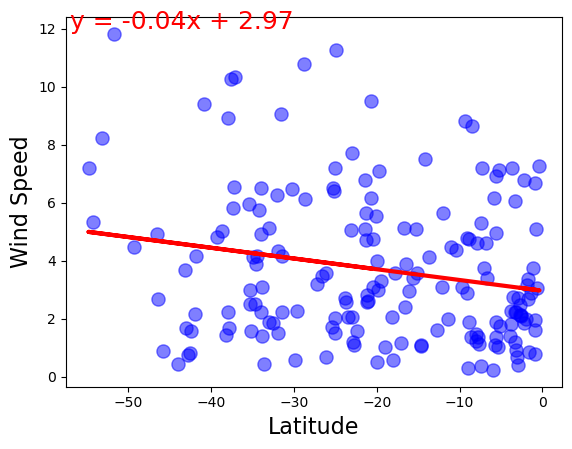

In [51]:
# Southern Hemisphere
x_plot = southern_hem_df["Lat"]
y_plot = southern_hem_df["Wind Speed"]
linearRegression(x_plot, y_plot, -57, 12, "Wind Speed")
plt.savefig("Fig12.png")

**Discussion about the linear relationship:** Negative relationship, wind speed decreases as you get closer to the equator, generally.